In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#读取users数据集
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(r'C:\\Users\金少\Desktop\Jupyter Notebook\movielens\users.dat', sep='::', header=None, names=unames, engine='python')

#读取ratings数据集
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(r'C:\\Users\金少\Desktop\Jupyter Notebook\movielens\ratings.dat', sep='::', header=None, names=rnames, engine='python')

#读取movies数据集
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(r'C:\\Users\金少\Desktop\Jupyter Notebook\movielens\movies.dat', sep='::', header=None, names=mnames, engine='python')

In [3]:
print(users.head(), end='\n\n')
print(ratings.head(), end='\n\n')
print(movies.head())

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


In [4]:
#先用pandas的merge函数将ratings跟users合并到一起，然后再将movies也合并进去
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [5]:
#按性别计算每部电影的平均得分（pivot_table()）
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [6]:
#计算每部电影的评分次数
ratings_by_title = data.groupby('title').size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [7]:
#选取评分次数在2000次以上的电影
active_titles = ratings_by_title.index[ratings_by_title >= 2000]
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings.head()

gender,F,M
title,,
Alien (1979),3.888252,4.216119
American Beauty (1999),4.238901,4.347301
Back to the Future (1985),3.932707,4.009259
Being John Malkovich (1999),4.159930,4.113636
Braveheart (1995),4.016484,4.297839


In [8]:
#分别筛选女性和男性喜欢的前10部电影
#对F列降序排列筛选出女性喜欢的电影
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
print("女性喜欢的前10部电影:")
print(top_female_ratings.iloc[:10,:1])

#对M列降序排列筛选出男性喜欢的电影
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
print("\n男性喜欢的前10部电影:")
print(top_male_ratings.iloc[:10,1:2])

女性喜欢的前10部电影:
gender                                            F
title                                              
Schindler's List (1993)                    4.562602
Shawshank Redemption, The (1994)           4.539075
Sixth Sense, The (1999)                    4.477410
Princess Bride, The (1987)                 4.342767
Raiders of the Lost Ark (1981)             4.332168
Godfather, The (1972)                      4.314700
Star Wars: Episode IV - A New Hope (1977)  4.302937
Silence of the Lambs, The (1991)           4.271955
American Beauty (1999)                     4.238901
Fargo (1996)                               4.217656

男性喜欢的前10部电影:
gender                                            M
title                                              
Godfather, The (1972)                      4.583333
Shawshank Redemption, The (1994)           4.560625
Raiders of the Lost Ark (1981)             4.520597
Star Wars: Episode IV - A New Hope (1977)  4.495307
Schindler's List (1993)              

In [9]:
#给mean_ratings加上一个用于存放平均得分之差的列（计算男女评分分歧）
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
mean_ratings.head()

gender,F,M,diff
title,,,
Alien (1979),3.888252,4.216119,0.327867
American Beauty (1999),4.238901,4.347301,0.108400
Back to the Future (1985),3.932707,4.009259,0.076552
Being John Malkovich (1999),4.159930,4.113636,-0.046293
Braveheart (1995),4.016484,4.297839,0.281355


In [10]:
#按"diff"排序即可得到分歧最大且女性观众更喜欢的电影（ 选取女性喜欢的分歧最大的前10部电影）
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
E.T. the Extra-Terrestrial (1982),4.089850,3.920264,-0.169586
Men in Black (1997),3.817844,3.719000,-0.098844
"Sixth Sense, The (1999)",4.477410,4.379944,-0.097465
Shakespeare in Love (1998),4.181704,4.099936,-0.081768
Schindler's List (1993),4.562602,4.491415,-0.071187
Toy Story (1995),4.187817,4.130552,-0.057265
"Princess Bride, The (1987)",4.342767,4.288942,-0.053826
Being John Malkovich (1999),4.159930,4.113636,-0.046293
"Shawshank Redemption, The (1994)",4.539075,4.560625,0.021550


In [11]:
#对排序结果反序即可得到分歧最大且男性观众更喜欢的电影
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
Terminator 2: Judgment Day (1991),3.785088,4.115367,0.330279
Alien (1979),3.888252,4.216119,0.327867
"Terminator, The (1984)",3.899729,4.205899,0.306170
Groundhog Day (1993),3.735562,4.041358,0.305796
Saving Private Ryan (1998),4.114783,4.398941,0.284159
Braveheart (1995),4.016484,4.297839,0.281355
Pulp Fiction (1994),4.071956,4.346839,0.274883
"Godfather, The (1972)",4.314700,4.583333,0.268634
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,0.238096


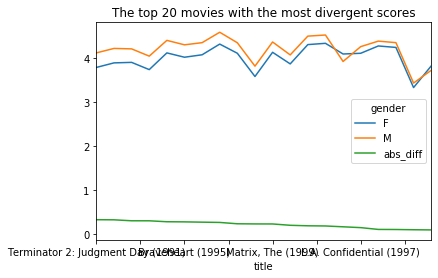

In [12]:
#折线图显示分歧最大的前20部电影得分（含男性评分，女性评分及差值）
mean_ratings['abs_diff'] = abs(mean_ratings['M'] - mean_ratings['F'])
sorted_by_abs_diff = mean_ratings.sort_values(by='abs_diff')
del sorted_by_abs_diff['diff']
sorted_by_abs_diff[::-1][:20].plot(title='The top 20 movies with the most divergent scores')

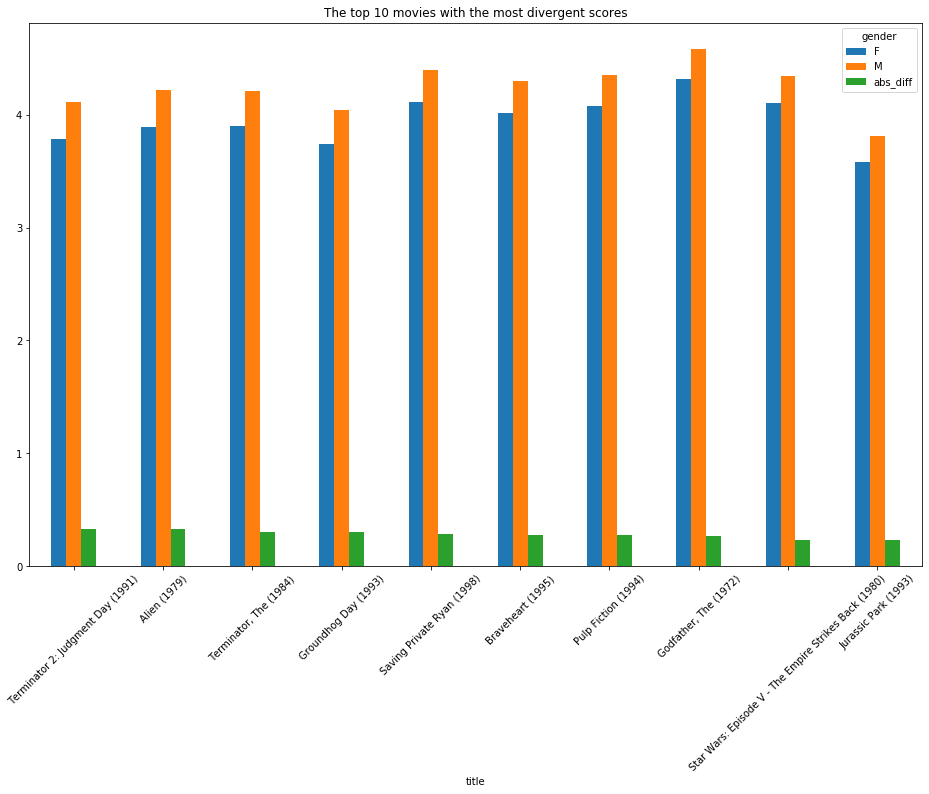

In [14]:
#绘制柱形图，显示分歧最大的前10部电影得分（含男性评分，女性评分及差值）
sorted_by_abs_diff[::-1][:10].plot(kind='bar',figsize=(16,10), rot=45, title='The top 10 movies with the most divergent scores')

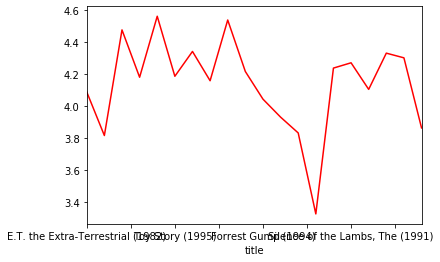

In [15]:
#绘制折线图，显示女性喜欢的分歧最大的前20部电影的女性评分（采用红色线）
sorted_by_diff[:20]['F'].plot(color='red')

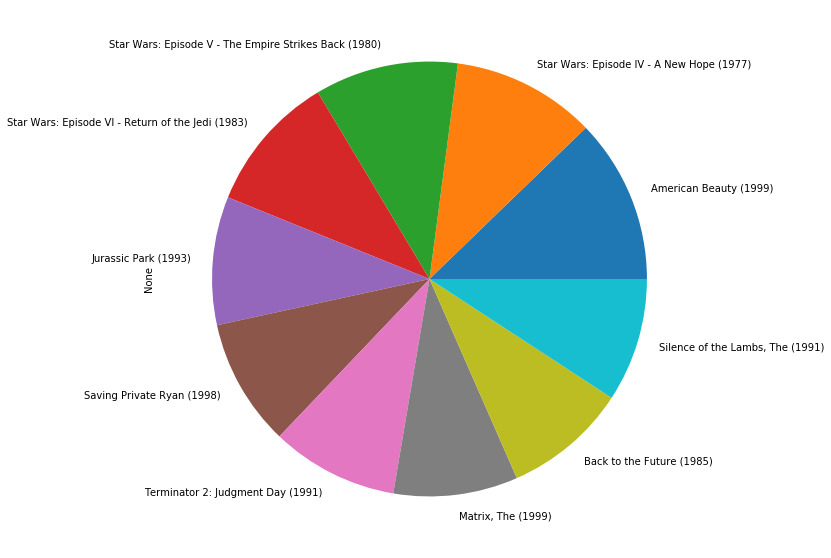

In [16]:
#绘制饼图，显示评分次数最高的前10部电影
ratings_by_title.sort_values(ascending=False)[:10].plot(kind='pie', figsize=(10,10))